In [11]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import confusion_matrix


In [12]:
#Question 1
from sklearn.datasets import load_digits

In [13]:
#Question 2
digit=load_digits()

In [19]:
x=digit.data

In [20]:
x.shape

(1797, 64)

In [21]:
y=digit.target

In [22]:
y.shape

(1797,)

In [24]:
x.size

115008

In [25]:
y.size

1797

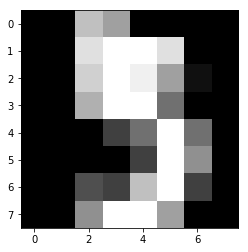

In [23]:
plt.imshow(x[5].reshape(8,8),cmap=plt.cm.gray)

In [26]:
#Question 3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [27]:
#Question 4
from sklearn.preprocessing import *

In [28]:
reg = LogisticRegression()

In [29]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predict=reg.predict(x_test)
predict

array([7, 1, 5, 3, 3, 6, 2, 2, 2, 0, 0, 5, 5, 7, 6, 1, 2, 8, 8, 8, 3, 1,
       1, 3, 6, 7, 8, 5, 4, 8, 7, 9, 0, 5, 9, 1, 1, 2, 9, 3, 3, 8, 5, 4,
       4, 2, 3, 3, 6, 0, 1, 8, 5, 7, 4, 8, 5, 2, 0, 0, 5, 8, 6, 9, 5, 9,
       8, 6, 8, 7, 2, 5, 7, 1, 8, 6, 0, 4, 8, 5, 4, 5, 7, 0, 1, 0, 2, 4,
       7, 1, 1, 7, 4, 8, 7, 5, 7, 0, 6, 3, 1, 8, 3, 0, 1, 8, 9, 8, 9, 5,
       5, 9, 0, 0, 1, 1, 4, 2, 0, 9, 3, 3, 2, 7, 6, 5, 5, 1, 1, 7, 6, 3,
       3, 5, 2, 3, 1, 7, 7, 1, 3, 7, 9, 3, 1, 8, 7, 5, 3, 7, 0, 1, 6, 4,
       6, 8, 0, 1, 5, 9, 2, 0, 2, 0, 5, 0, 9, 6, 2, 0, 4, 4, 1, 2, 4, 5,
       5, 1, 0, 8, 2, 3, 0, 7, 9, 2, 3, 9, 2, 4, 2, 7, 9, 7, 0, 9, 5, 5,
       4, 8, 4, 4, 2, 4, 7, 3, 4, 3, 3, 9, 6, 8, 5, 8, 4, 4, 9, 1, 1, 5,
       2, 8, 2, 2, 9, 8, 1, 1, 2, 7, 3, 1, 7, 4, 9, 2, 3, 1, 6, 9, 3, 0,
       0, 8, 4, 0, 4, 0, 4, 7, 3, 6, 5, 2, 7, 3, 3, 8, 4, 1, 2, 2, 0, 0,
       8, 7, 8, 1, 8, 3, 7, 2, 2, 5, 2, 7, 8, 4, 3, 3, 4, 1, 3, 1, 2, 7,
       7, 6, 4, 2, 3, 5, 3, 6, 6, 8, 7, 6, 6, 7, 2,

In [32]:
a=pd.DataFrame({"Actual":y_test,"predicted":predict})
a

,Actual,predicted
0,7,7
1,1,1
2,6,5
3,3,3
4,3,3
5,6,6
6,2,2
7,2,2
8,2,2
9,0,0


In [34]:
reg.score(x_test,y_test)

0.9611111111111111

In [36]:
from sklearn.metrics import accuracy_score


In [37]:
accuracy_score(y_test,predict)

0.9611111111111111

In [38]:
from sklearn.model_selection import KFold

In [40]:
kfold=model_selection.KFold(n_splits=10,random_state=7)
r=model_selection.cross_val_score(reg,x,y,cv=kfold,scoring="accuracy")
r

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [41]:
r.sum()/10

0.931530105524519

In [42]:
confusion_matrix(y_test,predict)

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 54,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  4, 53]], dtype=int64)

In [43]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.95      0.93      0.94        58
          2       1.00      0.96      0.98        56
          3       0.97      0.97      0.97        62
          4       1.00      0.98      0.99        56
          5       0.98      0.98      0.98        53
          6       1.00      0.98      0.99        48
          7       0.96      0.98      0.97        52
          8       0.81      0.91      0.86        47
          9       0.95      0.91      0.93        58

avg / total       0.96      0.96      0.96       540



In [44]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
z=reg.predict(x_test)
z

array([ 5.4917228 ,  3.04863666,  6.1920726 ,  3.33540704,  7.39655922,
        5.97580794,  2.07638199,  2.16856035,  1.26484488,  1.96949712,
        2.78876224,  4.78538758,  2.65639284,  8.27660206,  4.04112675,
        2.04034328,  0.60178018,  8.02534864,  7.12844442,  7.95782064,
        5.31607172,  3.04192173,  1.39706101,  2.34483893,  3.77178795,
        5.96575843,  7.47914178,  6.68999929,  5.51950228,  8.41466638,
        7.06424064,  7.59207279,  0.66762603,  6.36596543,  3.82733093,
        2.44273449,  0.78261438,  1.63662693,  6.32609983,  4.03482319,
        6.65030971,  6.05321894,  4.19518189,  3.35185346,  5.52703387,
        1.92693877,  3.84894712,  3.11995344,  4.64027692,  2.07174519,
        2.60758973,  5.20866269,  4.24013744,  5.87014809,  2.78722094,
        6.39934122,  7.03366151,  2.4448357 ,  1.40088235,  0.97085567,
        4.15935432,  6.47901991,  4.70289784,  6.42027535,  6.09600059,
        6.40414998,  8.09545673,  5.05103278,  4.35203982,  6.96

In [46]:
c=pd.DataFrame({"Actual":y_test,"predicted":z})
c

,Actual,predicted
0,7,5.491723
1,1,3.048637
2,6,6.192073
3,3,3.335407
4,3,7.396559
5,6,5.975808
6,2,2.076382
7,2,2.168560
8,2,1.264845
9,0,1.969497


In [48]:
Kfold=model_selection.KFold
Kfold =model_selection.KFold(n_splits=10,random_state=7)

res=model_selection.cross_val_score(reg,x,y,cv=Kfold,scoring="r2")
res

array([0.40105499, 0.63102463, 0.57072313, 0.59629035, 0.54519634,
       0.67174215, 0.61763556, 0.47611004, 0.4236549 , 0.41044286])

In [49]:
from sklearn.metrics import mean_squared_error



In [50]:
mean_squared_error(y_test,z)

3.6044142871736153

In [52]:
from sklearn.metrics import mean_absolute_error


In [53]:
mean_absolute_error(y_test,z)

1.4968720817793706